In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Let's run calibration...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LeCheapEyeTracker import Client, Server

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
fps = 30
T = 7.

calib = Client(et=Server(), timeline=np.linspace(0, T, T*fps), downscale=4)
calib.app.run()
calib.et.close()

window size :  (2560, 1440)
target dynamic :
 [(0.5, 0.006602048873901367), (0.5, 0.21684885025024414), (0.5, 0.3337998390197754), (0.5, 0.4498279094696045), (0.5, 0.5663340091705322), (0.5, 0.6831939220428467), (0.5, 0.7984158992767334), (0.5, 0.9125950336456299), (0.5, 1.0292668342590332), (0.5, 1.1447458267211914), (0.5, 1.2609179019927979), (0.5, 1.377445936203003), (0.5, 1.4925320148468018), (0.5, 1.610605001449585), (0.5, 1.7302260398864746), (0.5, 1.8467960357666016), (0.5, 1.9649410247802734), (0.33, 2.084756851196289), (0.33, 2.201589822769165), (0.33, 2.321441888809204), (0.33, 2.440610885620117), (0.33, 2.560497999191284), (0.33, 2.680008888244629), (0.33, 2.797075033187866), (0.33, 2.916195869445801), (0.5, 3.034421920776367), (0.5, 3.152003049850464), (0.5, 3.2705140113830566), (0.5, 3.389150857925415), (0.5, 3.508357048034668), (0.5, 3.627192974090576), (0.5, 3.7459609508514404), (0.5, 3.863057851791382), (0.5, 3.9814279079437256), (0.5, 4.098548889160156), (0.5, 4.215867

/usr/local/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


In [4]:
stim_x = np.array([])
eye_x = np.array([])

for stim in calib.stims_X_t:
    x, stash = stim
    stim_x = np.append(stim_x, x)
    
for eye in calib.et.eye_x_t:
    y, stash = eye
    eye_x = np.append(eye_x, y)

print (len(stim_x)==len(eye_x))

False


## ...and plot eye and targets x_positions 

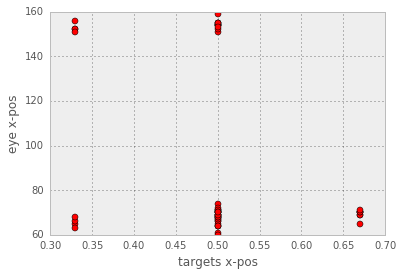

In [5]:
plt.plot(stim_x, eye_x, 'ro')
plt.xlabel('targets x-pos')
plt.ylabel('eye x-pos')
plt.show()

## We must get the mean of eye position for each stimulus position

In [11]:
i = 0
center = np.array([])
left = np.array([])
right = np.array([])

while i <= len(stim_x) - 1 :
    value = stim_x[i]
    if value == 0.33 :
        left = np.append(left, eye_x[i])
    elif value == 0.5 :
        center = np.append(center, eye_x[i])
    else :
        right = np.append(right, eye_x[i])
    i += 1

c_mean = np.mean(center)
l_mean = np.mean(left)
r_mean = np.mean(right)
        

In [12]:
print (l_mean)

43.2


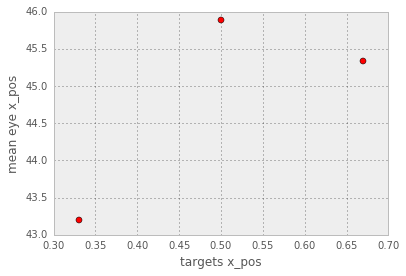

In [13]:
plt.plot([0.33, 0.5, 0.67], [l_mean, c_mean, r_mean], 'ro')
plt.xlabel('targets x_pos')
plt.ylabel('mean eye x_pos')
plt.show()

In [17]:
! git commit -am 'Dont work yet'

[master 5d09be7] Dont work yet
 1 file changed, 56 insertions(+), 7 deletions(-)


In [18]:
! git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	../src/my_eye.png

nothing added to commit but untracked files present (use "git add" to track)


In [19]:
! git push

Counting objects: 4, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 935 bytes | 0 bytes/s, done.
Total 4 (delta 3), reused 0 (delta 0)
To https://github.com/meduz/LeCheapEyeTracker
   1ddc5f7..5d09be7  master -> master
